In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('penguins_size.csv')

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [10]:
df=df[df['sex']!='.']

### Tarin test split

In [11]:
x = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y=df['species']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=101)

### Random forest classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
model= RandomForestClassifier(n_estimators=10,random_state=101)

In [20]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [21]:
y_pred=model.predict(x_test)

### Model evaluation

In [22]:
from sklearn.metrics import confusion_matrix,classification_report

In [26]:
cm = confusion_matrix(y_test,y_pred)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        43
   Chinstrap       1.00      0.97      0.98        31
      Gentoo       1.00      1.00      1.00        36

    accuracy                           0.99       110
   macro avg       0.99      0.99      0.99       110
weighted avg       0.99      0.99      0.99       110



In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

<Figure size 1000x600 with 0 Axes>

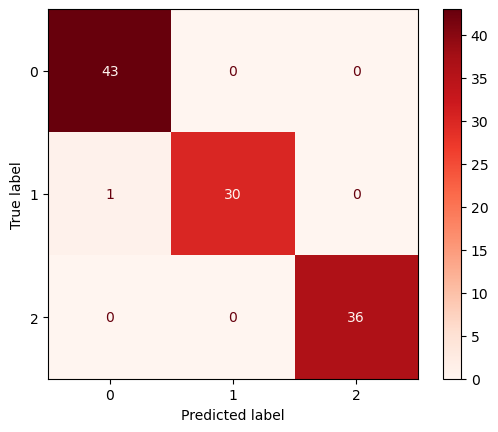

In [29]:
plt.figure(figsize=(10,6))
clf=ConfusionMatrixDisplay(confusion_matrix=cm)
clf.plot(cmap=plt.cm.Reds)
plt.show()

### Feature importance 

In [30]:
print(model.feature_importances_)

[0.38585104 0.10711138 0.2265437  0.14527118 0.1312816  0.00131245
 0.00262866]
